In [3]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv, k_fold_cv_with_deviance_gbr, plot_feature_importance
from sklearn import ensemble
from scripts.data_preprocessing import load_data, exclude_outliers
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

param = {
    'n_estimators': [300, 500],
    'tol': [0.01, 0.001],
    "max_depth": [3, 6],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 10, 15],
    "learning_rate": [0.1, 0.01],
    "loss": ["absolute_error", "squared_error"],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}
gboost = ensemble.GradientBoostingRegressor(**param)

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting 6 folds for each of 576 candidates, totalling 3456 fits
Best Parameters: {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 3, 'max_features': 'log2', 'min_impurity_decrease': 0.1, 'min_samples_split': 15, 'n_estimators': 300, 'tol': 0.01}


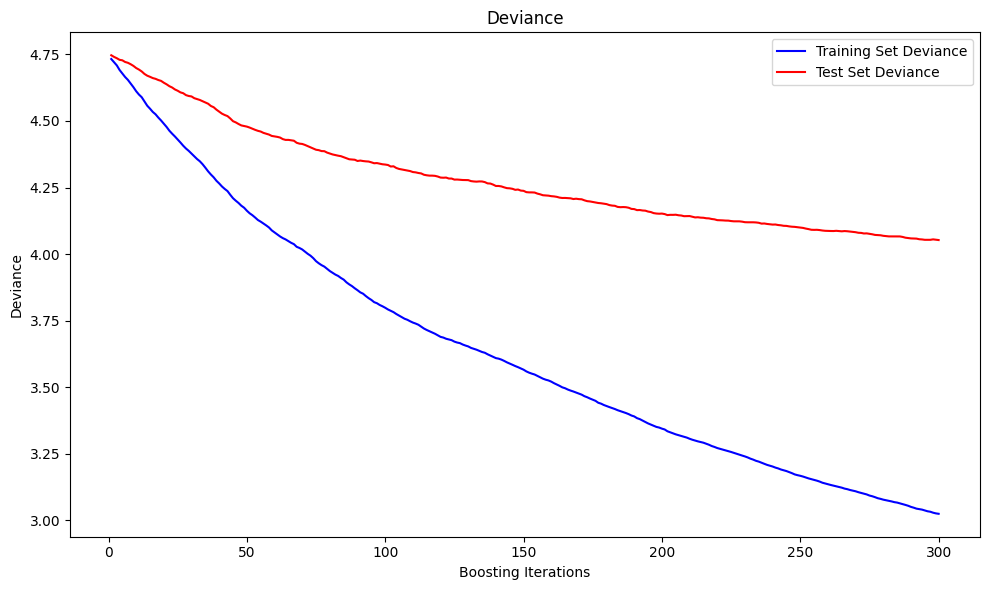

In [4]:
k_fold_cv_with_deviance_gbr(X, y, gboost, 6, param)

In [40]:
best_params = {
    'learning_rate': 0.01,
    'loss': 'absolute_error',
    'max_depth': 3,
    'max_features': 'log2',
    'min_samples_split': 15,
    'n_estimators': 300,
    'tol': 0.01,
    'min_impurity_decrease': 0.1,
}
gboost_best_params = ensemble.GradientBoostingRegressor(**best_params)


K-fold
Mean MSE: 100.46884376206775
Mean MAE: 4.41235986904288
Mean R2: 0.07403363688738888
RMSE: 10.023414775517761


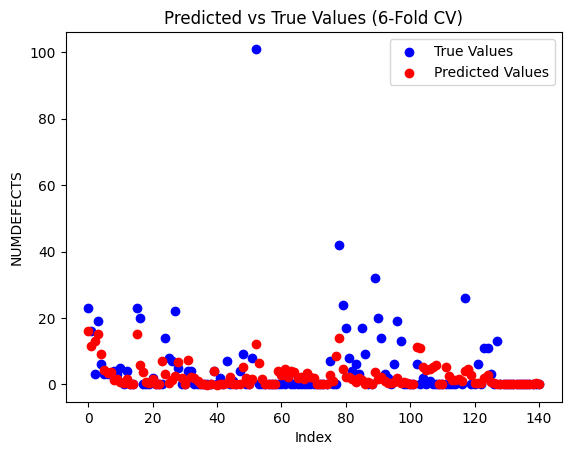

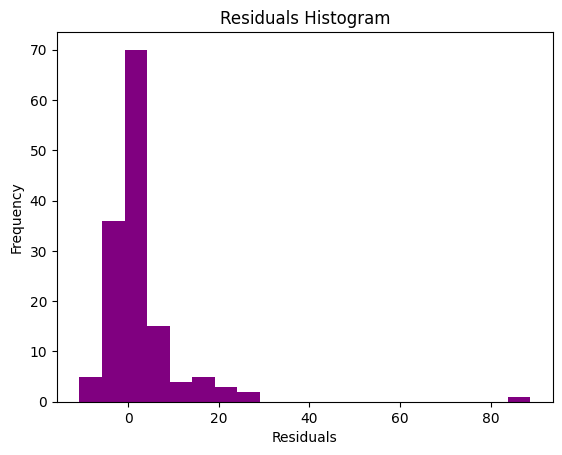

In [41]:
print('\nK-fold')
k_fold_results = k_fold_cv(X, y, gboost_best_params, 6)

LOOCV
R squared (LOOCV): -6.770239165431317
Average MSE (LOOCV): 96.55324253813741
Average RMSE (LOOCV): 9.826150952338224
Average MAE (LOOCV): 4.065360198986534


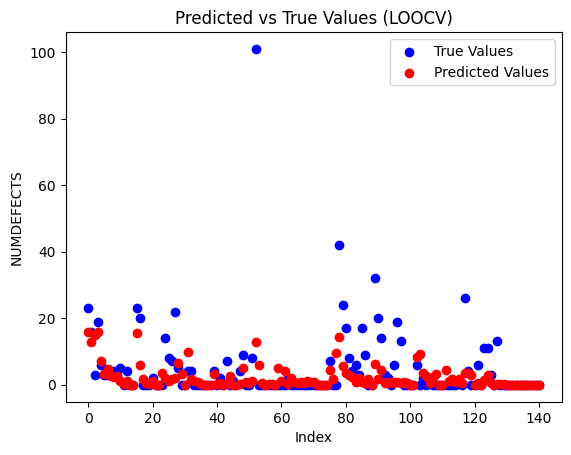

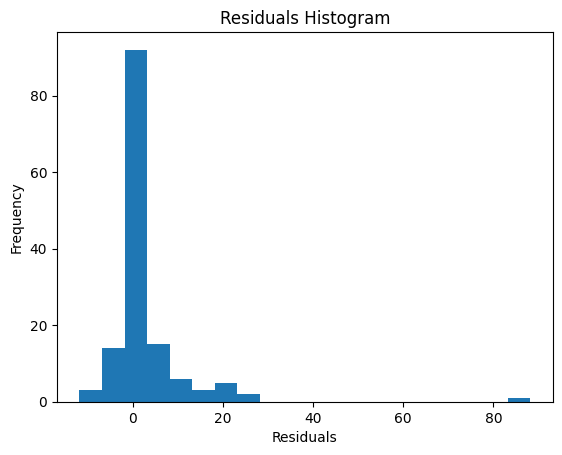

In [42]:
print('LOOCV')
loocv_results = loocv(X, y, gboost_best_params)

In [43]:
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric      LOOCV      6-Fold
0     R2  -6.770239    0.074034
1    MSE  96.553243  100.468844
2   RMSE   9.826151   10.023415
3    MAE   4.065360    4.412360


LOOCV
R squared (LOOCV): -7.330843761615791
Average MSE (LOOCV): 36.48776200462868
Average RMSE (LOOCV): 6.040510078182858
Average MAE (LOOCV): 3.1983543619513357


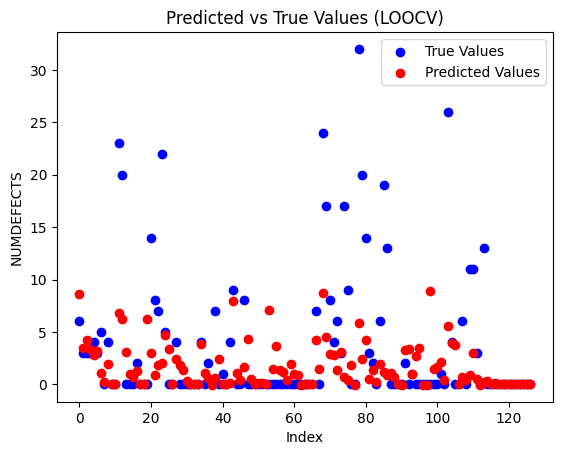

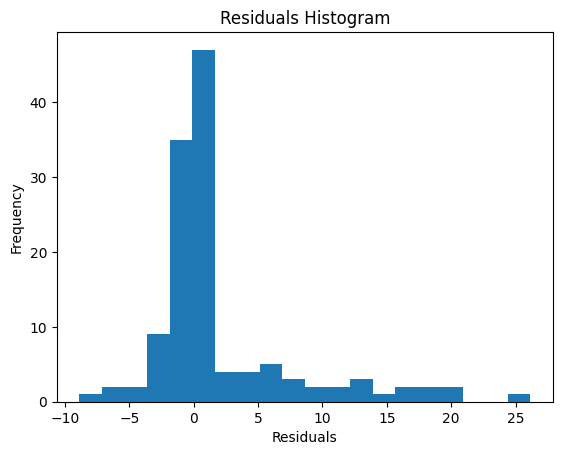


6-fold
Mean MSE: 39.30397775424892
Mean MAE: 3.610109075068873
Mean R2: -0.109325173687895
RMSE: 6.269288456774733


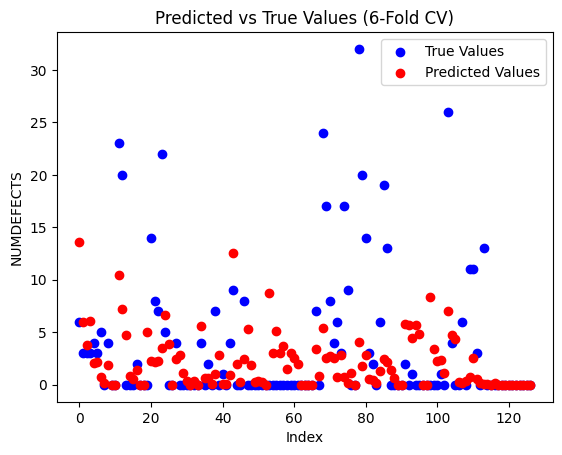

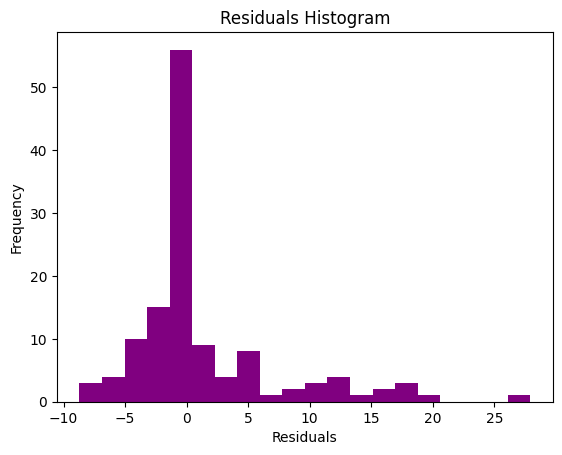

In [44]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, gboost_best_params)

print('\n6-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, gboost_best_params, 6)

In [45]:
comparison_table2 = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '6-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table2)

  Metric      LOOCV     6-Fold
0     R2  -7.330844  -0.109325
1    MSE  36.487762  39.303978
2   RMSE   6.040510   6.269288
3    MAE   3.198354   3.610109


Feature Importance (MDI):
maxLOC_COMMENTS: 0.0205
maxHALSTEAD_EFFORT: 0.0206
maxHALSTEAD_LENGTH: 0.0208
sumHALSTEAD_VOLUME: 0.0215
sumHALSTEAD_DIFFICULTY: 0.0228
LACK_OF_COHESION_OF_METHODS: 0.0230
avgHALSTEAD_EFFORT: 0.0244
sumCYCLOMATIC_COMPLEXITY: 0.0249
maxNUM_UNIQUE_OPERANDS: 0.0255
sumHALSTEAD_PROG_TIME: 0.0285
maxLOC_TOTAL: 0.0296
maxHALSTEAD_VOLUME: 0.0326
COUPLING_BETWEEN_OBJECTS: 0.0340
sumBRANCH_COUNT: 0.0346
sumLOC_TOTAL: 0.0422


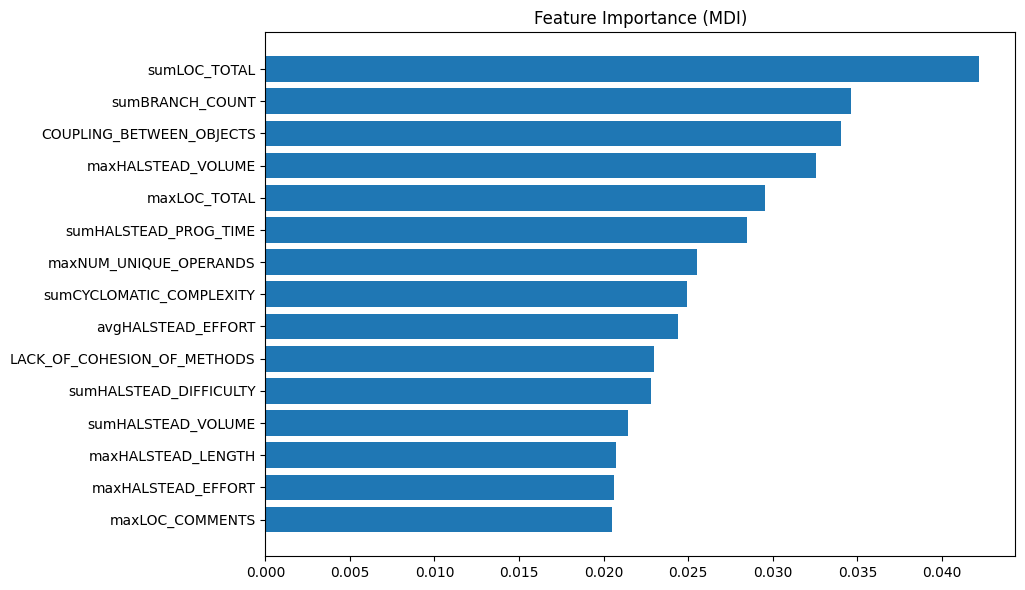

In [39]:
gboost_best_params.fit(X, y)
plot_feature_importance(X, gboost_best_params, y, 15)